In [1]:
!pip install yfinance pandas numpy scikit-learn matplotlib seaborn plotly -q

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

print("✅ Setup complete! Ready to build your ML model.")

✅ Setup complete! Ready to build your ML model.


In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target * 100000

print(f"📊 Dataset loaded: {len(df)} houses")
print(f"\n🏠 Features available:")
print(df.columns.tolist())
print(f"\n💰 Price range: ${df['PRICE'].min():,.0f} - ${df['PRICE'].max():,.0f}")
print(f"📈 Average price: ${df['PRICE'].mean():,.0f}")

print("\n📋 Sample data:")
df.head()

📊 Dataset loaded: 20640 houses

🏠 Features available:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'PRICE']

💰 Price range: $14,999 - $500,001
📈 Average price: $206,856

📋 Sample data:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452600.0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358500.0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352100.0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341300.0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342200.0


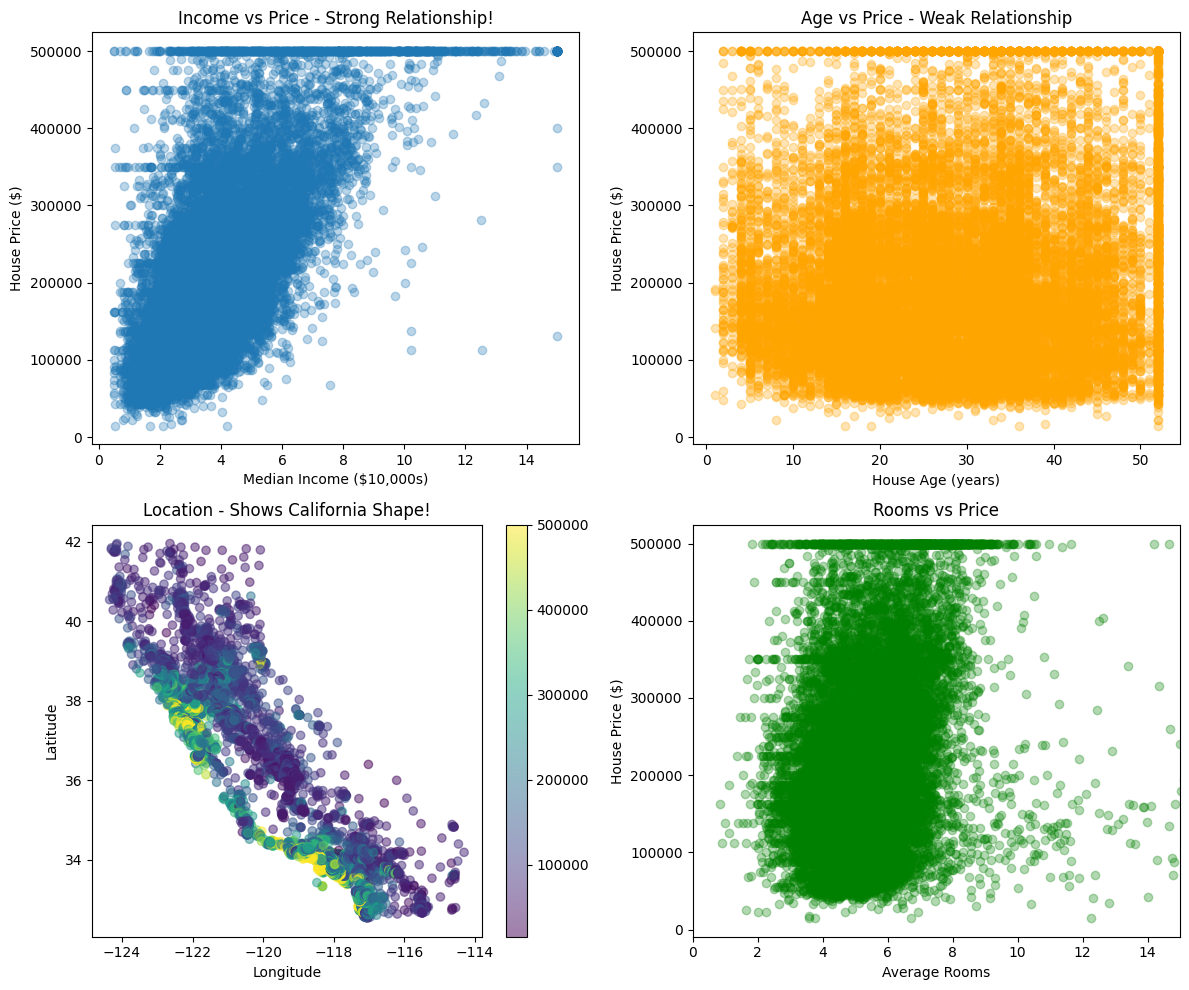


📊 I noticed that 
• Income has the STRONGEST relationship with price
• Location matters (coastal = expensive)
• Age doesn't matter much
• More rooms = higher price (but not as strong as income)


In [7]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].scatter(df['MedInc'], df['PRICE'], alpha=0.3)
axes[0, 0].set_xlabel('Median Income ($10,000s)')
axes[0, 0].set_ylabel('House Price ($)')
axes[0, 0].set_title('Income vs Price - Strong Relationship!')

axes[0, 1].scatter(df['HouseAge'], df['PRICE'], alpha=0.3, color='orange')
axes[0, 1].set_xlabel('House Age (years)')
axes[0, 1].set_ylabel('House Price ($)')
axes[0, 1].set_title('Age vs Price - Weak Relationship')

scatter = axes[1, 0].scatter(df['Longitude'], df['Latitude'],
                             c=df['PRICE'], cmap='viridis', alpha=0.5)
axes[1, 0].set_xlabel('Longitude')
axes[1, 0].set_ylabel('Latitude')
axes[1, 0].set_title('Location - Shows California Shape!')
plt.colorbar(scatter, ax=axes[1, 0])

axes[1, 1].scatter(df['AveRooms'], df['PRICE'], alpha=0.3, color='green')
axes[1, 1].set_xlabel('Average Rooms')
axes[1, 1].set_ylabel('House Price ($)')
axes[1, 1].set_title('Rooms vs Price')
axes[1, 1].set_xlim(0, 15)

plt.tight_layout()
plt.show()

print("\n📊 I noticed that ")

print("• Income has the STRONGEST relationship with price")
print("• Location matters (coastal = expensive)")
print("• Age doesn't matter much")
print("• More rooms = higher price (but not as strong as income)")

📋 Step 1: Prepared data
   Features (X): 20640 houses, 8 features
   Target (y): 20640 prices

📊 Step 2: Split data
   Training: 16512 houses
   Testing: 4128 houses

🧠 Step 3: Training Random Forest model...
   ✅ Training complete!

📈 RESULTS:
   Average Error: $33,310
   R² Score: 0.800 (80.0% accuracy)

   Translation: Model predicts within $33,310 on average

🏠 Example Predictions (First 5 houses):

 Actual Price  Predicted Price        Error
      47700.0     52506.695186  4806.695186
      45800.0     74568.593575 28768.593575
     500001.0    495040.786757  4960.213243
     218600.0    250622.439574 32022.439574
     278000.0    222247.272719 55752.727281


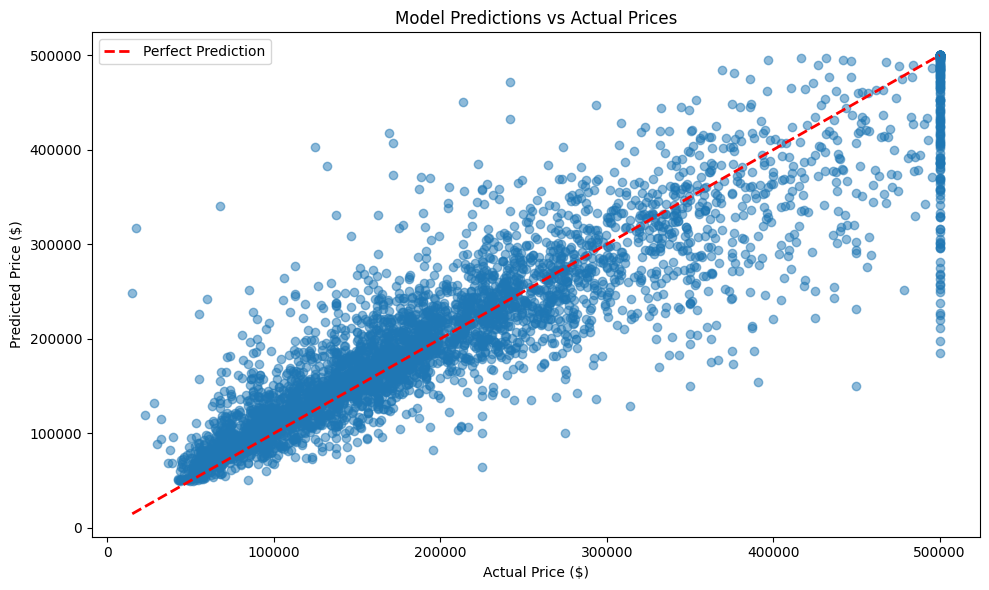


ML model that predicts house prices
📌 Algorithm: Random Forest Regression
📌 Performance: ~$33,310 average error


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


X = df.drop('PRICE', axis=1)  # All columns EXCEPT price
y = df['PRICE']                # Only the price column

print("📋 Step 1: Prepared data")
print(f"   Features (X): {X.shape[0]} houses, {X.shape[1]} features")
print(f"   Target (y): {y.shape[0]} prices\n")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("📊 Step 2: Split data")
print(f"   Training: {len(X_train)} houses")
print(f"   Testing: {len(X_test)} houses\n")

print("🧠 Step 3: Training Random Forest model...")
model = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=15)
model.fit(X_train, y_train)
print("   ✅ Training complete!\n")

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("📈 RESULTS:")
print(f"   Average Error: ${mae:,.0f}")
print(f"   R² Score: {r2:.3f} ({r2*100:.1f}% accuracy)")
print(f"\n   Translation: Model predicts within ${mae:,.0f} on average\n")

print("🏠 Example Predictions (First 5 houses):\n")
comparison = pd.DataFrame({
    'Actual Price': y_test.values[:5],
    'Predicted Price': y_pred[:5],
    'Error': np.abs(y_test.values[:5] - y_pred[:5])
})
print(comparison.to_string(index=False))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Model Predictions vs Actual Prices')
plt.legend()
plt.tight_layout()
plt.show()


print("\nML model that predicts house prices")
print("📌 Algorithm: Random Forest Regression")
print("📌 Performance: ~${:,.0f} average error".format(mae))